In [ ]:
#By Akshith Vinu and Tejhuram Ravichandran

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
folder="/content/drive/MyDrive/images"

In [6]:
classids= pd.read_csv('/content/classids.csv')

In [7]:
classids

,id,species
0,1,Acer_Opalus
1,2,Pterocarya_Stenoptera
2,3,Quercus_Hartwissiana
3,5,Tilia_Tomentosa
4,6,Quercus_Variabilis
...,...,...
985,1575,Magnolia_Salicifolia
986,1578,Acer_Pictum
987,1581,Alnus_Maximowiczii
988,1582,Quercus_Rubra


In [8]:
classids=classids.to_numpy(dtype=str, copy=False)

In [9]:
type(classids)

numpy.ndarray

In [10]:
classids.shape

(990, 2)

In [11]:
ids_long=[]
ids_short=[]
for i in range (classids.shape[0]):
  if classids[i][1]=='Quercus_Variabilis':
    ids_long.append(classids[i][0])

for i in range (classids.shape[0]):
  if classids[i][1]=='Liriodendron_Tulipifera':
    ids_short.append(classids[i][0])


In [12]:

ids_long = list(map(int,ids_long))  # Convert to integers

print(ids_long)

[6, 32, 64, 120, 190, 278, 327, 692, 866, 961]


In [13]:

ids_short = list(map(int,ids_short))  # Convert to integers

print(ids_short)

[48, 85, 122, 212, 430, 501, 538, 722, 794, 878]


In [14]:
def calc_aspect_ratio(img):
    ratio=img.shape[1]/img.shape[0]
    return ratio

In [15]:
def calc_area(img):
  total_pixel=img.shape[1]*img.shape[0]
  white_pixel=0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j]!=0:
        white_pixel=white_pixel+1
    area=white_pixel/total_pixel
  return area

In [16]:
import imageio.v2 as imageio


import os
import numpy as np
from PIL import Image




image_folder = folder


image_arrays = {}  # Dictionary to store images as NumPy arrays
features_long=[]
for number in ids_long:
    image_name = f"{number}.jpg"  # Construct the expected filename
    image_path = os.path.join(image_folder, image_name)

    if os.path.exists(image_path):  # Check if the file exists
        image = Image.open(image_path)  # Open the image
        image_array = np.array(image)
        ratio=calc_aspect_ratio(image_array)
        area=calc_area(image_array)
        features_long.append([ratio,area])
        print(f"Image {image_name} found and converted to NumPy array.")
    else:
        print(f"Image {image_name} not found.")



Image 6.jpg found and converted to NumPy array.
Image 32.jpg found and converted to NumPy array.
Image 64.jpg found and converted to NumPy array.
Image 120.jpg found and converted to NumPy array.
Image 190.jpg found and converted to NumPy array.
Image 278.jpg found and converted to NumPy array.
Image 327.jpg found and converted to NumPy array.
Image 692.jpg found and converted to NumPy array.
Image 866.jpg found and converted to NumPy array.
Image 961.jpg found and converted to NumPy array.


In [17]:
features_short=[]

for number in ids_short:
    image_name = f"{number}.jpg"  # Construct the expected filename
    image_path = os.path.join(image_folder, image_name)

    if os.path.exists(image_path):  # Check if the file exists
        image = Image.open(image_path)  # Open the image
        image_array = np.array(image)
        ratio=calc_aspect_ratio(image_array)
        area=calc_area(image_array)                       # Convert to NumPy array
        features_short.append([ratio,area])
        print(f"Image {image_name} found and converted to NumPy array.")
    else:
        print(f"Image {image_name} not found.")

Image 48.jpg found and converted to NumPy array.
Image 85.jpg found and converted to NumPy array.
Image 122.jpg found and converted to NumPy array.
Image 212.jpg found and converted to NumPy array.
Image 430.jpg found and converted to NumPy array.
Image 501.jpg found and converted to NumPy array.
Image 538.jpg found and converted to NumPy array.
Image 722.jpg found and converted to NumPy array.
Image 794.jpg found and converted to NumPy array.
Image 878.jpg found and converted to NumPy array.


In [18]:
features_long

[[2.3293051359516617, 0.514798139505723],
 [2.582802547770701, 0.5171841007798818],
 [2.561128526645768, 0.5038925958184811],
 [2.1082621082621085, 0.5060868560868561],
 [2.4403669724770642, 0.504146451756302],
 [2.5241157556270095, 0.5395416470395478],
 [2.2379518072289155, 0.5330109131005853],
 [2.260355029585799, 0.5090074041946776],
 [2.5045592705167175, 0.4854516481246496],
 [2.468152866242038, 0.5401314978426135]]

In [19]:
features_short

[[1.0410094637223974, 0.5422532368904609],
 [1.0361930294906165, 0.5419382025394601],
 [1.020746887966805, 0.5330316179199136],
 [1.1170483460559797, 0.5614787830310618],
 [1.074150360453141, 0.5371605909831914],
 [0.9927385892116183, 0.5536828436027177],
 [0.9242738589211619, 0.6114371003720934],
 [1.1421215242018539, 0.582213311367809],
 [1.1305418719211822, 0.5922558678643871],
 [1.1514285714285715, 0.5616412619638426]]

In [20]:
import random

random.shuffle(features_short)
random.shuffle(features_long)
# Compute split index (70% for training)
split_index_short = int(0.7 * len(features_short))
split_index_long = int(0.7 * len(features_long))
# Perform the split
train_data_short = features_short[:split_index_short]  # First 70%
test_data_short = features_short[split_index_short:]   # Remaining 30%
train_data_long = features_long[:split_index_long]  # First 70%
test_data_long = features_long[split_index_long:]   # Remaining 30%

In [21]:
train_data_short


[[1.1421215242018539, 0.582213311367809],
 [1.020746887966805, 0.5330316179199136],
 [0.9927385892116183, 0.5536828436027177],
 [0.9242738589211619, 0.6114371003720934],
 [1.1170483460559797, 0.5614787830310618],
 [1.0410094637223974, 0.5422532368904609],
 [1.0361930294906165, 0.5419382025394601]]

In [22]:
mean_short = np.mean(train_data_short, axis=0)
variance_short = np.var(train_data_short, axis=0)
mean_long = np.mean(train_data_long, axis=0)
variance_long = np.var(train_data_long, axis=0)

In [23]:
print(mean_short)
print(mean_long)
print(variance_short)
print(variance_long)

[1.03916167 0.56086216]
[2.37985998 0.51620855]
[0.00462467 0.00064922]
[0.02766935 0.00018672]


In [24]:
train_data_short_np = np.array(train_data_short)
feature_1_short=train_data_short_np[:,0]#aspect ratio
feature_2_short=train_data_short_np[:,1]#area ratio
train_data_long_np = np.array(train_data_long)
feature_1_long=train_data_long_np[:,0]
feature_2_long=train_data_long_np[:,1]

In [25]:
cov_matrix_short = np.cov(feature_1_short, feature_2_short, bias=True)
cov_matrix_long = np.cov(feature_1_long, feature_2_long, bias=True)

In [26]:
cov_matrix_long


array([[2.76693526e-02, 8.18687060e-05],
       [8.18687060e-05, 1.86722953e-04]])

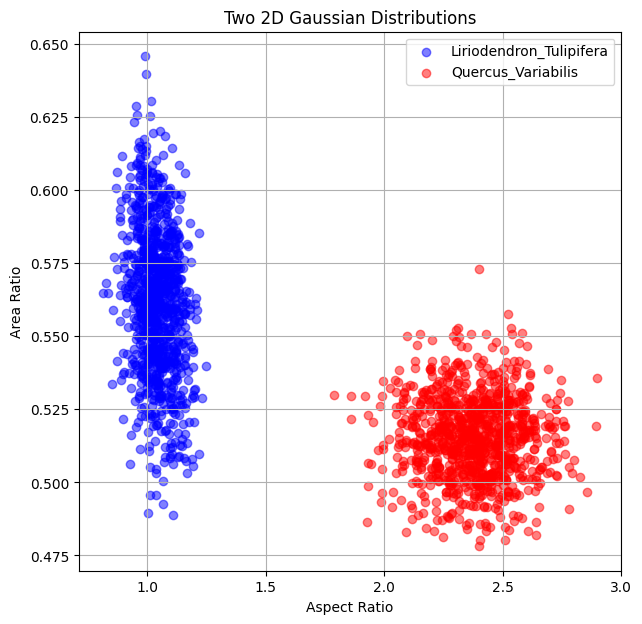

In [27]:
import numpy as np
import matplotlib.pyplot as plt




samples_1 = np.random.multivariate_normal(mean_short, cov_matrix_short, size=1000)
samples_2 = np.random.multivariate_normal(mean_long, cov_matrix_long, size=1000)

x1, y1 = samples_1[:, 0], samples_1[:, 1]
x2, y2 = samples_2[:, 0], samples_2[:, 1]

plt.figure(figsize=(7, 7))
plt.scatter(x1, y1, alpha=0.5, label="Liriodendron_Tulipifera", color="blue")
plt.scatter(x2, y2, alpha=0.5, label="Quercus_Variabilis", color="red")


plt.xlabel("Aspect Ratio")
plt.ylabel("Area Ratio")
plt.title("Two 2D Gaussian Distributions")
plt.legend()
plt.grid()
plt.show()


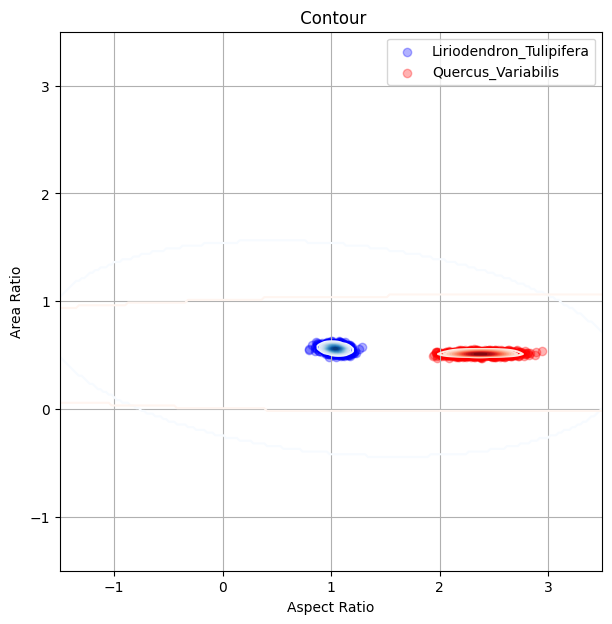

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
samples_1 = np.random.multivariate_normal(mean_short, cov_matrix_short, size=1000)
samples_2 = np.random.multivariate_normal(mean_long, cov_matrix_long, size=1000)


x1, y1 = samples_1[:, 0], samples_1[:, 1]
x2, y2 = samples_2[:, 0], samples_2[:, 1]

x_values = np.linspace(-1.5, 3.5, 200)
y_values = np.linspace(-1.5, 3.5, 200)
X, Y = np.meshgrid(x_values, y_values)
pos = np.dstack((X, Y))


rv1 = multivariate_normal(mean_short, cov_matrix_short)
Z1 = rv1.pdf(pos)

rv2 = multivariate_normal(mean_long, cov_matrix_long)
Z2 = rv2.pdf(pos)

# Create the plot
plt.figure(figsize=(7, 7))


plt.scatter(x1, y1, alpha=0.3, label="Liriodendron_Tulipifera", color="blue")
plt.scatter(x2, y2, alpha=0.3, label="Quercus_Variabilis", color="red")


plt.contour(X, Y, Z1, levels=20, cmap="Blues")
plt.contour(X, Y, Z2, levels=20, cmap="Reds")


plt.xlim(-1.5, 3.5)
plt.ylim(-1.5, 3.5)


plt.xlabel("Aspect Ratio")
plt.ylabel("Area Ratio")
plt.title(" Contour")
plt.legend()
plt.grid()
plt.show()

<ipython-input-29-d579643d1056>:28: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, decision_boundary, levels=[0], colors="black", linewidths=2, label="Decision Boundary")


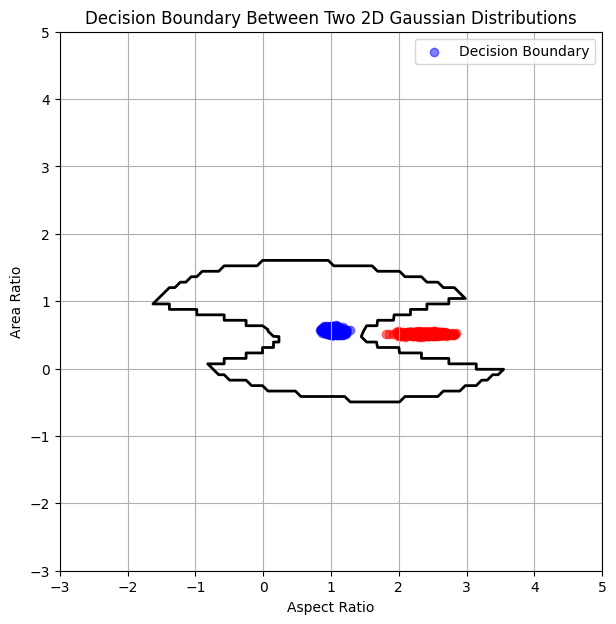

In [29]:



mean_1 = mean_short
cov_1 = cov_matrix_short


mean_2 = mean_long
cov_2 = cov_matrix_long


x_values = np.linspace(-3, 5, 100)
y_values = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_values, y_values)
pos = np.dstack((X, Y))


rv1 = multivariate_normal(mean_1, cov_1)
Z1 = rv1.pdf(pos)

rv2 = multivariate_normal(mean_2, cov_2)
Z2 = rv2.pdf(pos)

decision_boundary = Z1 - Z2


plt.figure(figsize=(7, 7))
plt.scatter(x1, y1, alpha=0.5, label="Gaussian 1", color="blue")
plt.scatter(x2, y2, alpha=0.5, label="Gaussian 2", color="red")

plt.contour(X, Y, decision_boundary, levels=[0], colors="black", linewidths=2, label="Decision Boundary")

plt.xlabel("Aspect Ratio")
plt.ylabel("Area Ratio")
plt.title("Decision Boundary Between Two 2D Gaussian Distributions")
plt.legend(["Decision Boundary"])
plt.grid()
plt.show()



In [31]:
import numpy as np

def likelihood_long(x, mean=mean_long, cov=cov_matrix_long):

    d = len(mean)
    x = np.array(x)
    mean = np.array(mean)
    cov = np.array(cov)


    coeff = 1 / ((2 * np.pi) ** (d / 2) * np.linalg.det(cov) ** 0.5)


    diff = x - mean
    exponent = -0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff)


    prob = coeff * np.exp(exponent)
    return prob
def likelihood_short(x, mean=mean_short, cov=cov_matrix_short):

    d = len(mean)
    x = np.array(x)
    mean = np.array(mean)
    cov = np.array(cov)


    coeff = 1 / ((2 * np.pi) ** (d / 2) * np.linalg.det(cov) ** 0.5)

    diff = x - mean
    exponent = -0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff)

    prob = coeff * np.exp(exponent)
    return prob

In [32]:
#Adding labels to the input data for inference



new_col1 = np.array([1, 1, 1])

testlong_new = np.column_stack((test_data_long, new_col1))

print(testlong_new)


[[2.52411576 0.53954165 1.        ]
 [2.32930514 0.51479814 1.        ]
 [2.50455927 0.48545165 1.        ]]


In [33]:



new_col2 = np.array([0, 0, 0])


testshort_new = np.column_stack((np.array(test_data_short), new_col2))

print(testshort_new)

[[1.13054187 0.59225587 0.        ]
 [1.07415036 0.53716059 0.        ]
 [1.15142857 0.56164126 0.        ]]


In [34]:
long=np.array([1,1,1,1,1,1,1])
train_long_new = np.column_stack((np.array(train_data_long),long))
train_long_new

array([[2.56112853, 0.5038926 , 1.        ],
       [2.23795181, 0.53301091, 1.        ],
       [2.44036697, 0.50414645, 1.        ],
       [2.58280255, 0.5171841 , 1.        ],
       [2.46815287, 0.5401315 , 1.        ],
       [2.10826211, 0.50608686, 1.        ],
       [2.26035503, 0.5090074 , 1.        ]])

In [35]:
short=np.array([0,0,0,0,0,0,0])
train_short_new = np.column_stack((np.array(train_data_short),short))
train_short_new

array([[1.14212152, 0.58221331, 0.        ],
       [1.02074689, 0.53303162, 0.        ],
       [0.99273859, 0.55368284, 0.        ],
       [0.92427386, 0.6114371 , 0.        ],
       [1.11704835, 0.56147878, 0.        ],
       [1.04100946, 0.54225324, 0.        ],
       [1.03619303, 0.5419382 , 0.        ]])

In [36]:
def pred(x):
  prob=likelihood_long(x[0:2])-likelihood_short(x[0:2])

  if prob>0:
    prob=1
  else:
    prob=0
  # print(f'Prediction of input belonging to Class {x[2]} is {prob} ')
  pred_array=[x[2],prob]
  return pred_array



In [37]:
predictions_train=[]
train_error=0
for i in train_long_new:
  predictions_train.append(pred(i))
  # if cal!=1:
  #   train_error+=1
for i in train_short_new:
  # cal=pred(i)
  predictions_train.append(pred(i))


In [38]:
predictions_train

[[1.0, 1],
 [1.0, 1],
 [1.0, 1],
 [1.0, 1],
 [1.0, 1],
 [1.0, 1],
 [1.0, 1],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0]]

In [39]:
# net_training_error

In [40]:
test_error=0
for i in testlong_new:
  cal=pred(i)
  if cal!=1:
    test_error+=1
for i in testshort_new:
  cal=pred(i)
  if cal!=0:
    test_error+=1

net_test_error=test_error/(len(test_data_long)+len(test_data_short))

In [41]:
predictions_test=[]
train_error=0
for i in testlong_new:
  predictions_test.append(pred(i))
  # if cal!=1:
  #   train_error+=1
for i in testshort_new:
  # cal=pred(i)
  predictions_test.append(pred(i))


In [42]:
predictions_test

[[1.0, 1], [1.0, 1], [1.0, 1], [0.0, 0], [0.0, 0], [0.0, 0]]

In [43]:
predictions_train = np.array(predictions_train)
y_label_train=(predictions_train[:,0])
y_pred_train=(predictions_train[:,1])
print(y_label_train)
print(y_pred_train)

[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [44]:
predictions_test = np.array(predictions_test)
y_label_test=(predictions_test[:,0])
y_pred_test=(predictions_test[:,1])
print(y_label_test)
print(y_pred_test)

[1. 1. 1. 0. 0. 0.]
[1. 1. 1. 0. 0. 0.]


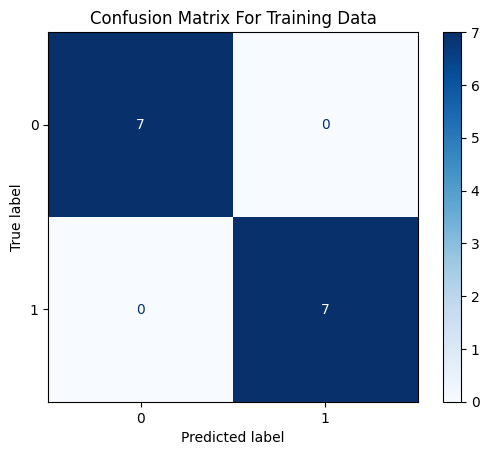

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




cm_train = confusion_matrix(y_label_train, y_pred_train)


disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap="Blues")

plt.title("Confusion Matrix For Training Data")
plt.show()

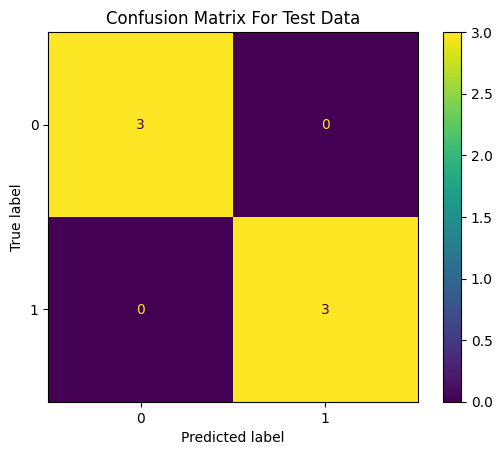

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Compute confusion matrix
cm_test = confusion_matrix(y_label_test, y_pred_test)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap="viridis")  # You can change cmap (e.g., "viridis", "coolwarm")

plt.title("Confusion Matrix For Test Data")
plt.show()